#測試

In [0]:
#圖片轉RGB方法一
from PIL import Image
import numpy as np
mask=np.array(Image.open("4913c03a44a0dfb816597.jpg"))
print(mask)


In [0]:
#圖片轉RGB方法二
#opencv pip install opencv-python
from PIL import Image
import cv2 as cv
mask2=cv.imread("4913c03a44a0dfb816597.jpg")
#print(mask)

In [0]:
#另外上傳CV2的haarcascade_frontalface_default.xml
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(mask2, 1.3, 5)

取得臉在圖片上的位置

In [0]:
#opencv get face position
x,y,w,h = faces[0]

In [0]:
img = Image.open('4913c03a44a0dfb816597.jpg')

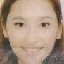

In [0]:
crpim = img.crop((x,y, x + w, y + h)).resize((64,64))
crpim

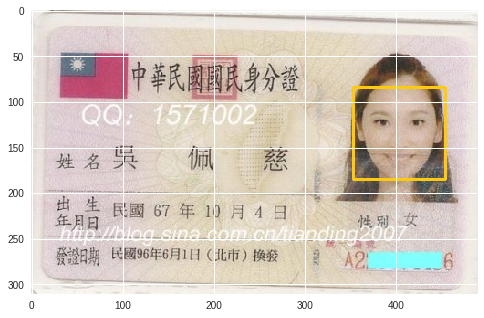

In [0]:
#框臉
from matplotlib import pyplot as plt 
plt.figure(figsize=(8,6))
cv.rectangle(mask2,(x,y),(x+w,y+h),(14,201,255),2)
plt.imshow(cv.cvtColor(mask2, cv.COLOR_BGR2RGB))

In [0]:
picdir=
getIdolImg('/wu/',picdir)

In [0]:
for (i, f) in enumerate(flist):
    mask_1=cv.imread(f)
    face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(mask_1, 1.3, 5)
    x,y,w,h = faces[0]
    img = Image.open(f)
    crpim = img.crop((x,y, x + w, y + h)).resize((64,64))
    break
    

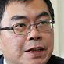

In [0]:
crpim

#導入Pillow與Open CV

In [0]:
from PIL import Image
import numpy as np
import cv2 as cv

#Google Colab Read from Drive

In [0]:
#取得google drive 的資料
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import glob
flist = glob.glob("/gdrive/My Drive/Colab_Read_files/know/*")
flist

['/gdrive/My Drive/Colab_Read_files/know/andy.jpg',
 '/gdrive/My Drive/Colab_Read_files/know/jeff.jpg',
 '/gdrive/My Drive/Colab_Read_files/know/wu.jpg',
 '/gdrive/My Drive/Colab_Read_files/know/k_andy2.jpg']

In [0]:
import glob
unknow = glob.glob("/gdrive/My Drive/Colab_Read_files/unknow/*")
unknow

['/gdrive/My Drive/Colab_Read_files/unknow/2.jpg',
 '/gdrive/My Drive/Colab_Read_files/unknow/3.jpg',
 '/gdrive/My Drive/Colab_Read_files/unknow/1.jpg']

#訓練圖片與測試圖片 抓臉另存

In [0]:
#建立資料夾 
if not os.path.exists('test'):
        os.mkdir('test')

In [0]:
#抓臉
import os
def getIdolImg():
  for (i, f) in enumerate(flist):
    mask_1=cv.imread(f)
    face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(mask_1, 1.3, 5)
    x,y,w,h = faces[0]
    img = Image.open(f)
    crpim = img.crop((x,y, x + w, y + h)).resize((64,64))
    if i==0:
      if not os.path.exists('train/andy'):
        os.mkdir('train/andy')
      crpim.save('train/andy/andy.jpg')
    elif i==1:
      if not os.path.exists('train/jeff'):
        os.mkdir('train/jeff')
      crpim.save('train/jeff/jeff.jpg')
    elif i==2:
      if not os.path.exists('train/wu'):
        os.mkdir('train/wu')
      crpim.save('train/wu/wu.jpg')
    elif i==3:
      if not os.path.exists('train/andy'):
        os.mkdir('train/andy')
      crpim.save('train/andy/andy1.jpg')

In [0]:
#抓臉
import os
def getIdolImg_test():
  for (i, f) in enumerate(unknow):
    mask_1=cv.imread(f)
    face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(mask_1, 1.3, 5)
    x,y,w,h = faces[0]
    img = Image.open(f)
    crpim = img.crop((x,y, x + w, y + h)).resize((64,64))
    if i==0:
      if not os.path.exists('test/jeff'):
        os.mkdir('test/jeff')
      crpim.save('test/jeff/jeff.jpg')
    elif i==1:
      if not os.path.exists('test/andy'):
        os.mkdir('test/andy')
      crpim.save('test/andy/andy.jpg')
    elif i==2:
      if not os.path.exists('test/wu'):
        os.mkdir('test/wu')
      crpim.save('test/wu/wu.jpg')

In [0]:
#train
getIdolImg()
#test
#getIdolImg_test()

#CNN Model

In [0]:
#CNN
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64,
3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 3, activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

In [0]:
#TF
import tensorflow as tf
def cnnLayer(classnum):
    ''' create cnn layer'''
    # 第一层
    W1 = weightVariable([3, 3, 3, 32]) # 卷积核大小(3,3)， 输入通道(3)， 输出通道(32)
    b1 = biasVariable([32])
    conv1 = tf.nn.relu(conv2d(x_data, W1) + b1)
    pool1 = maxPool(conv1)
    # 减少过拟合，随机让某些权重不更新
    drop1 = dropout(pool1, keep_prob_5) # 32 * 32 * 32 多个输入channel 被filter内积掉了

    # 第二层
    W2 = weightVariable([3, 3, 32, 64])
    b2 = biasVariable([64])
    conv2 = tf.nn.relu(conv2d(drop1, W2) + b2)
    pool2 = maxPool(conv2)
    drop2 = dropout(pool2, keep_prob_5) # 64 * 16 * 16

    # 第三层
    W3 = weightVariable([3, 3, 64, 64])
    b3 = biasVariable([64])
    conv3 = tf.nn.relu(conv2d(drop2, W3) + b3)
    pool3 = maxPool(conv3)
    drop3 = dropout(pool3, keep_prob_5) # 64 * 8 * 8

    # 全连接层
    Wf = weightVariable([8*16*32, 512])
    bf = biasVariable([512])
    drop3_flat = tf.reshape(drop3, [-1, 8*16*32])
    dense = tf.nn.relu(tf.matmul(drop3_flat, Wf) + bf)
    dropf = dropout(dense, keep_prob_75)

    # 输出层
    Wout = weightVariable([512, classnum])
    bout = weightVariable([classnum])
    #out = tf.matmul(dropf, Wout) + bout
    out = tf.add(tf.matmul(dropf, Wout), bout)
    return out


#Keras Image Preprocess

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     
                                   zoom_range = 0.2,      
                                   horizontal_flip = True 
                                  )

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [0]:
training_set = train_datagen.flow_from_directory(
    r'train/', target_size = (64, 64),
     batch_size = 10,
     class_mode = 'categorical')

Found 4 images belonging to 3 classes.


In [0]:
test_set = test_datagen.flow_from_directory(
    r'test/', target_size = (64, 64),
     batch_size = 10,
     class_mode = 'categorical')

Found 4 images belonging to 3 classes.


In [0]:
training_set

#CNN Fit

In [0]:
history = classifier.fit_generator(training_set,
                         nb_epoch=10,
                         nb_val_samples=10,
                         steps_per_epoch = 30,
                         verbose = 1,
                         validation_data = test_set)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=30, verbose=1, validation_data=<keras_pre..., epochs=10, validation_steps=10)`
  


Epoch 1/10
30/30 [==============================] - 2s 80ms/step - loss: 0.5539 - acc: 0.7667 - val_loss: 0.4221 - val_acc: 0.7500
Epoch 2/10
30/30 [==============================] - 0s 14ms/step - loss: 0.0479 - acc: 0.9917 - val_loss: 1.1658 - val_acc: 0.7500
Epoch 3/10
30/30 [==============================] - 0s 15ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.7337 - val_acc: 0.7500
Epoch 4/10
30/30 [==============================] - 0s 15ms/step - loss: 6.3440e-04 - acc: 1.0000 - val_loss: 0.6450 - val_acc: 0.7500
Epoch 5/10
30/30 [==============================] - 0s 15ms/step - loss: 4.5104e-04 - acc: 1.0000 - val_loss: 0.7865 - val_acc: 0.7500
Epoch 6/10
30/30 [==============================] - 0s 15ms/step - loss: 2.9527e-04 - acc: 1.0000 - val_loss: 0.9826 - val_acc: 0.7500
Epoch 7/10
30/30 [==============================] - 0s 16ms/step - loss: 1.9528e-04 - acc: 1.0000 - val_loss: 0.8071 - val_acc: 0.7500
Epoch 8/10
30/30 [==============================] - 0s 15ms/step - 

#CNN Model  Test Result

In [0]:
transform_dic = {
    'andy'  : 'Andy',
    'jeff'    : 'Jeff',
    'wu' : 'Wu'
}
name_dic = {v:transform_dic.get(k) for k,v in training_set.class_indices.items()}

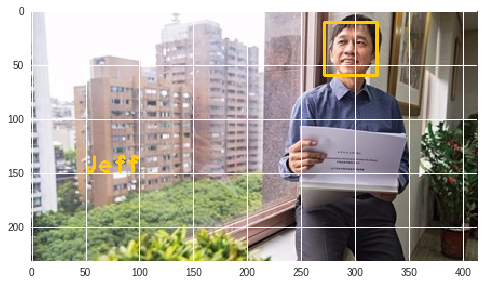

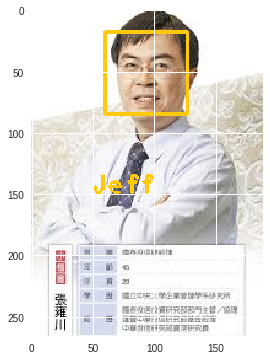

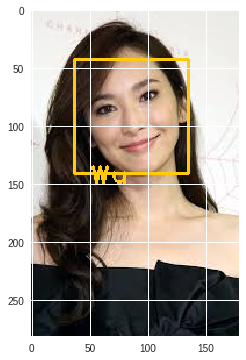

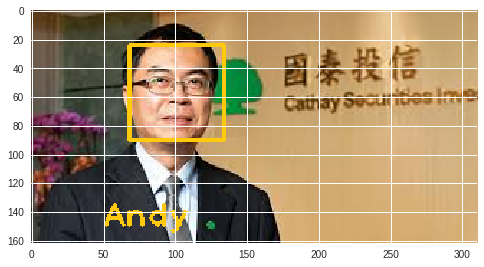

In [0]:
#(x + int(w/3)-70, y-10) 字的位置
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt 
font = cv.FONT_HERSHEY_PLAIN
unknow.append('k_andy3.jpg')
for (i, f) in enumerate(unknow):
    mask_1=cv.imread(f)
    face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(mask_1, 1.3, 5)
    x,y,w,h = faces[0]
    img = Image.open(f)
    for x,y,w,h in faces:
      box = (x, y, x+w, y+h)
      crpim = img.crop(box).resize((64,64))
      target_image = image.img_to_array(crpim)
      target_image = np.expand_dims(target_image, axis = 0)
      res = classifier.predict_classes(target_image)[0]
      cv.rectangle(mask_1,(x,y),(x+w,y+h),(14,201,255),2)
      cv.putText(mask_1,name_dic.get(res), (50,150), font, 1.5, (14,201,255), 2)
    plt.figure(figsize=(8,6))
    plt.imshow(cv.cvtColor(mask_1, cv.COLOR_BGR2RGB))